<a href="https://colab.research.google.com/github/martinkim1/2024-1-my-BDA/blob/main/inclass/06w_0409_B_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#빅데이터 분석 프로그래밍
### 06주차 B반

#파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1


# 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.6 MB/s eta 0:00:00


In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

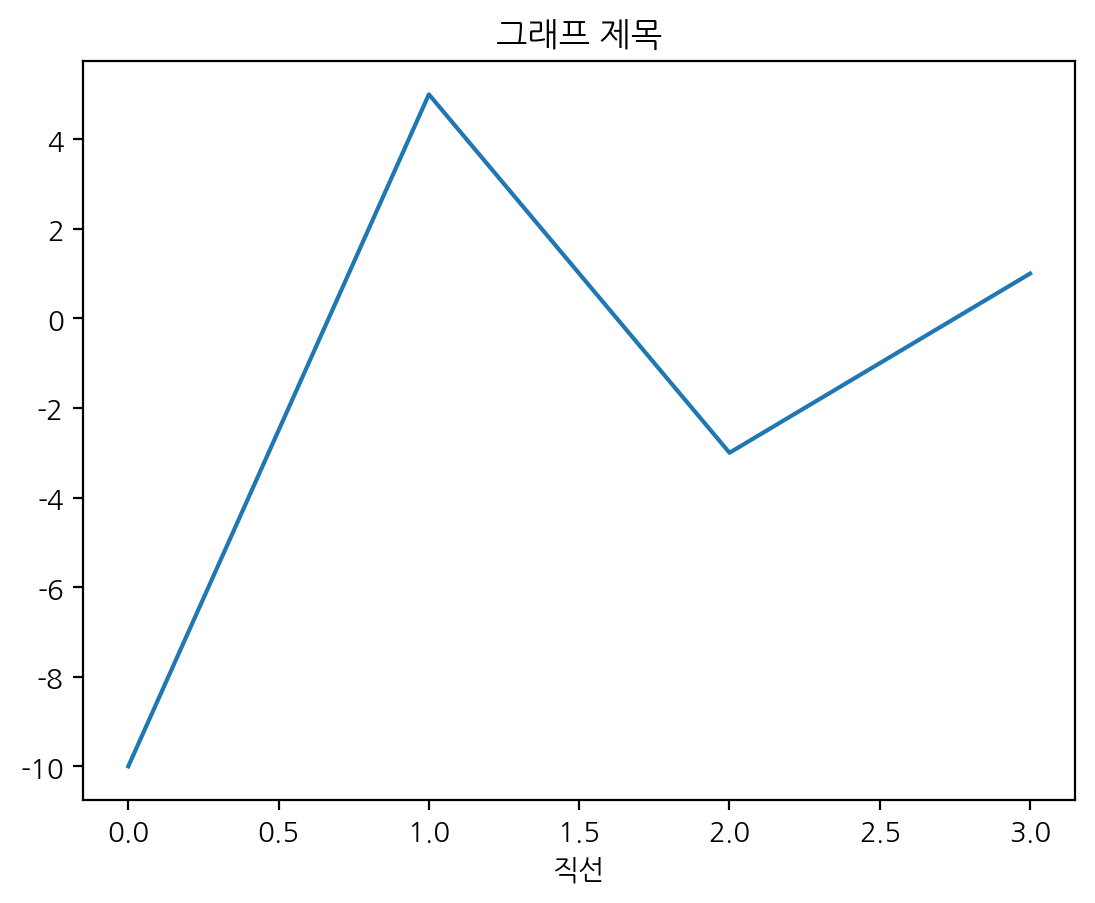

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

# 수업에서 사용할 데이터를 다음 깃에서 복사

In [7]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.91 MiB/s, done.


In [8]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


# 07 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

## 결측치 찾기

In [10]:
# 시험 나올 수 있음
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df
''' 아래 데이터 프레임 주고 코드 작성
    데이터 프레임의 각 행과 열이 어떻게 나오는지 이해하고 넘어가야 함'''

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [11]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

# 결측치 확인하기 (시험에 나옴)

In [12]:
pd.isna(df) # nan 부분이 true로 반환

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [13]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [14]:
df.isnull() # =isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [15]:
df.notna()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [16]:
df.notnull() # = notna()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [17]:
df.isna().sum()

sex      1
score    1
dtype: int64

In [18]:
df.isna().sum(axis=1) # 시험 나옴

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [19]:
s = pd.Series([True, False, True, False])
s

0     True
1    False
2     True
3    False
dtype: bool

In [20]:
s.sum()

2

In [21]:
s.any()

True

In [22]:
s.all()

False

In [23]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [24]:
df.isna().any(axis=0)

sex      True
score    True
dtype: bool

In [25]:
df.isna().any(axis=1)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [27]:
b = df.isna().any(axis=1)
b

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [29]:
df[b]

,sex,score
2,NaN,3.0
4,F,NaN


In [30]:
#적어도 NaN이 하나 있는 행을 추출
df[df.isna().any(axis=1)]
# 중요!!

,sex,score
2,NaN,3.0
4,F,NaN


In [31]:
#NaN이 하나도 없는 행을 추출
df[~df.isna().any(axis=1)]
# 중요!!

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [32]:
#NaN이 하나도 없는 행을 추출
df[df.notna().all(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


# 결측값 시각화
- 패키지 missingno

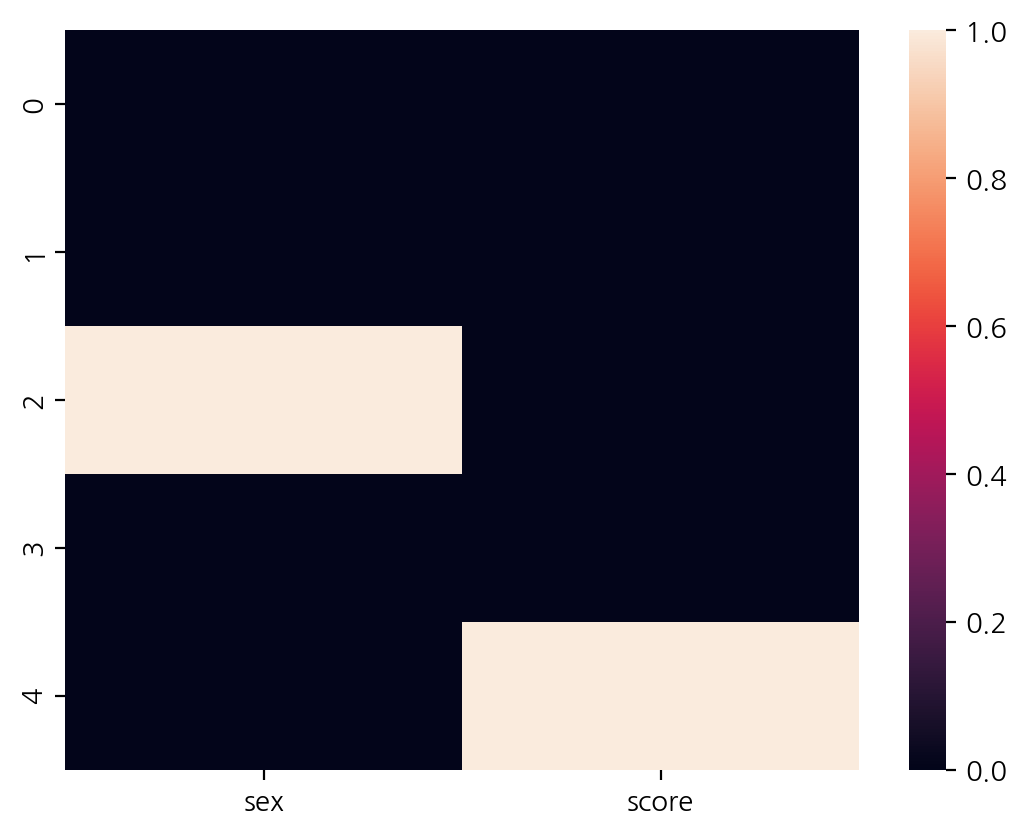

In [33]:
import seaborn as sns
sns.heatmap(df.isnull());

<Axes: >

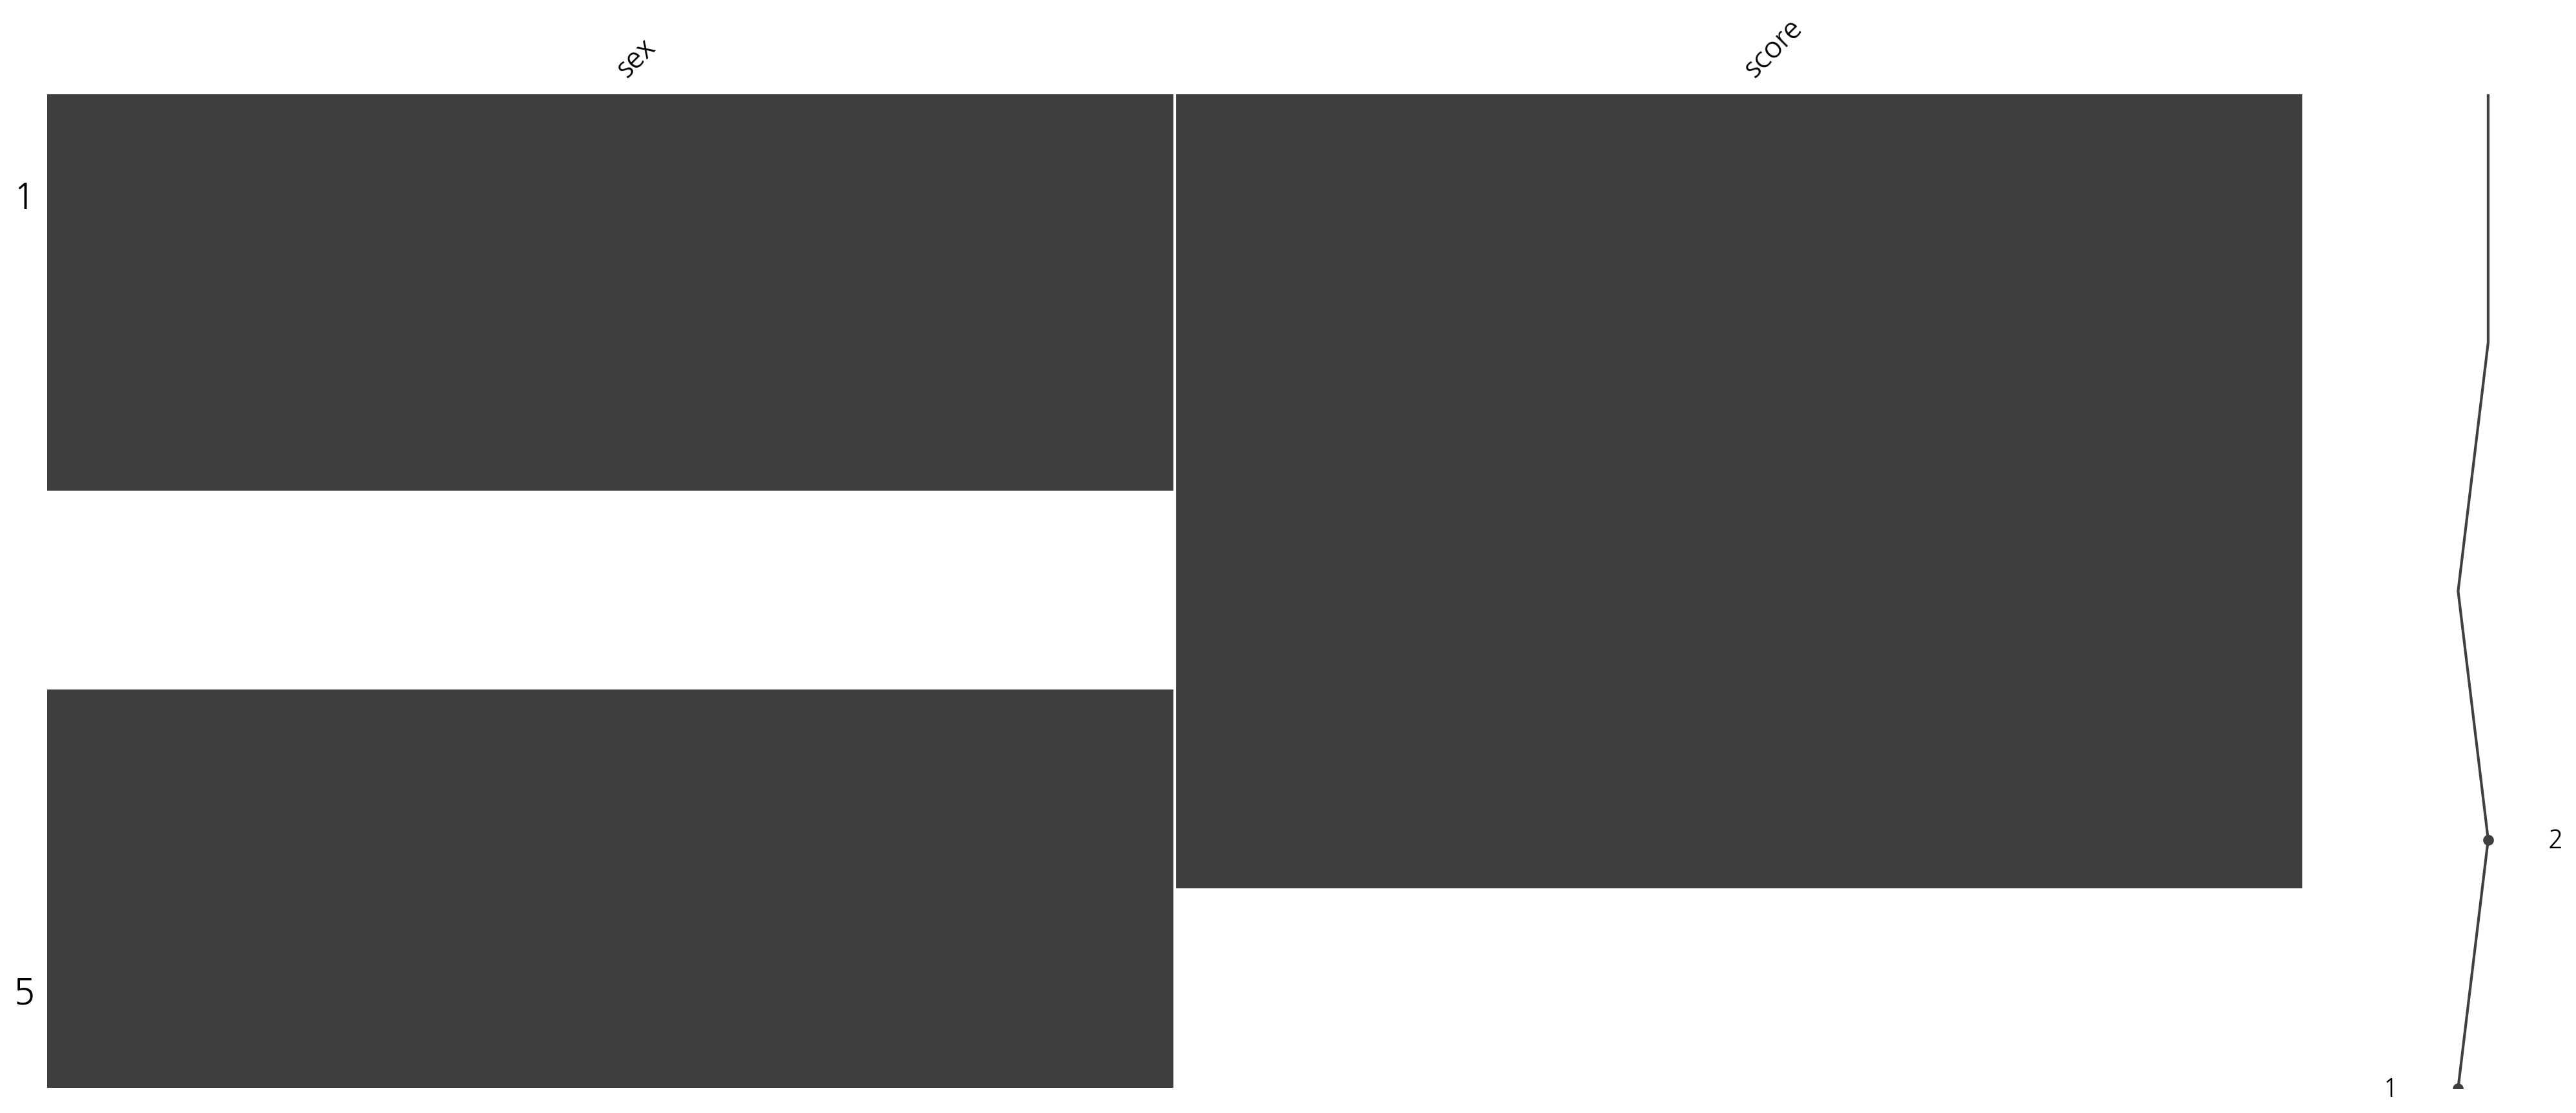

In [34]:
import missingno as msno
msno.matrix(df)

<Axes: >

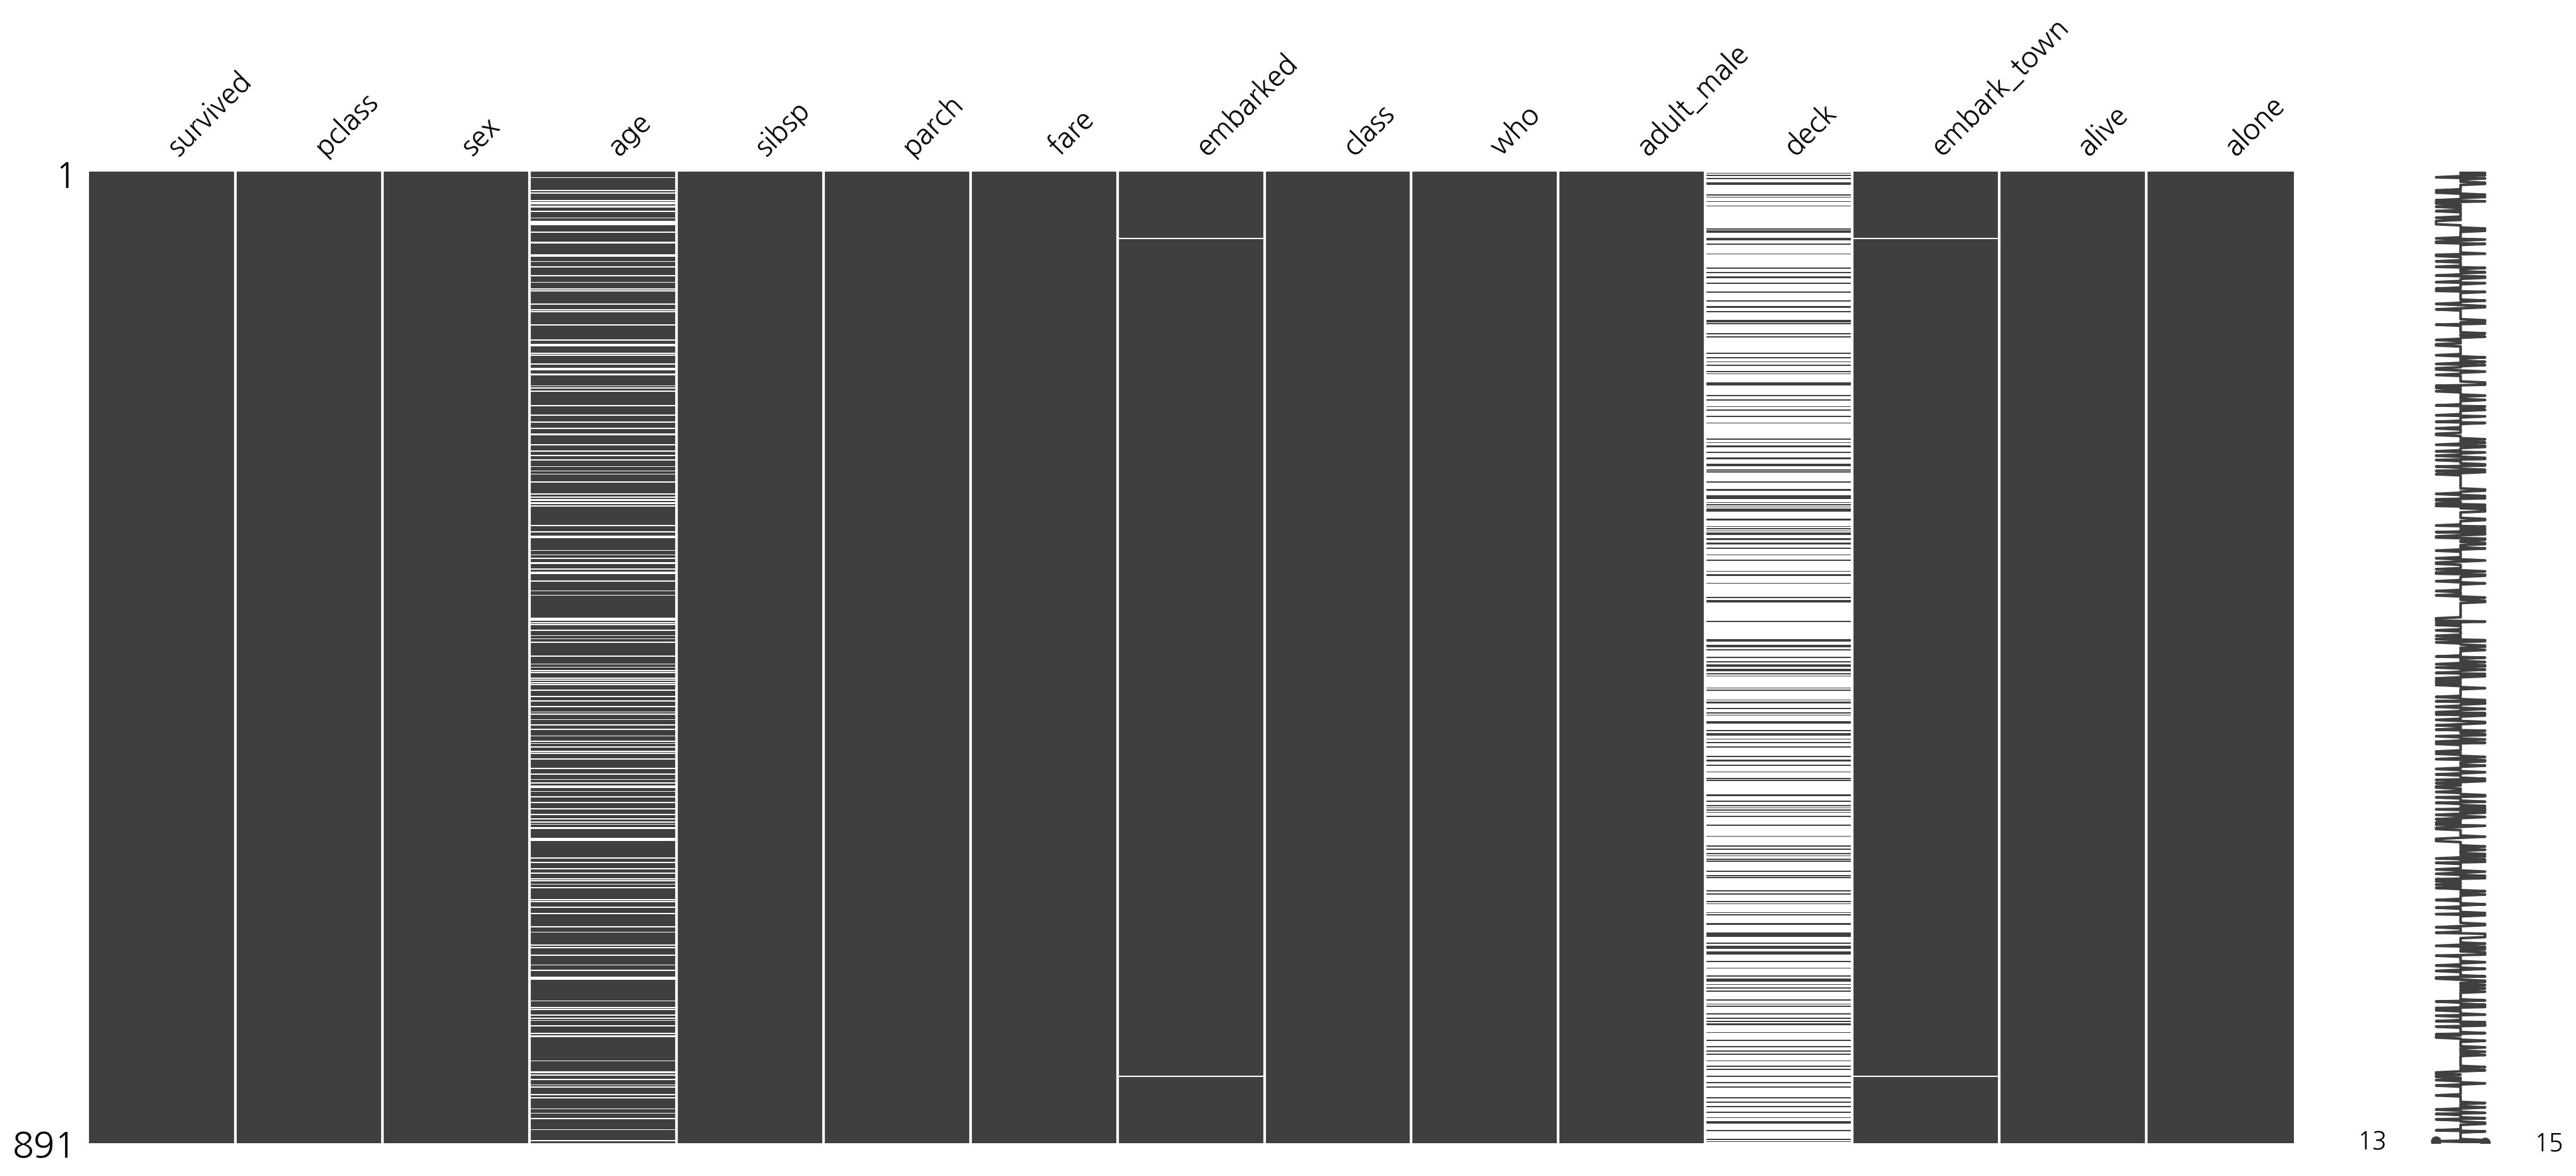

In [36]:
tdf = sns.load_dataset('titanic')
msno.matrix(tdf)

In [37]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
595,0,3,male,36.0,1,1,24.15,S,Third,man,True,NaN,Southampton,no,False
85,1,3,female,33.0,3,0,15.85,S,Third,woman,False,NaN,Southampton,yes,False
233,1,3,female,5.0,4,2,31.39,S,Third,child,False,NaN,Southampton,yes,False
306,1,1,female,NaN,0,0,110.88,C,First,woman,False,NaN,Cherbourg,yes,True
818,0,3,male,43.0,0,0,6.45,S,Third,man,True,NaN,Southampton,no,True
656,0,3,male,NaN,0,0,7.90,S,Third,man,True,NaN,Southampton,no,True
451,0,3,male,NaN,1,0,19.97,S,Third,man,True,NaN,Southampton,no,False
695,0,2,male,52.0,0,0,13.50,S,Second,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.00,S,First,man,True,NaN,Southampton,no,True
139,0,1,male,24.0,0,0,79.20,C,First,man,True,B,Cherbourg,no,True


<Axes: >

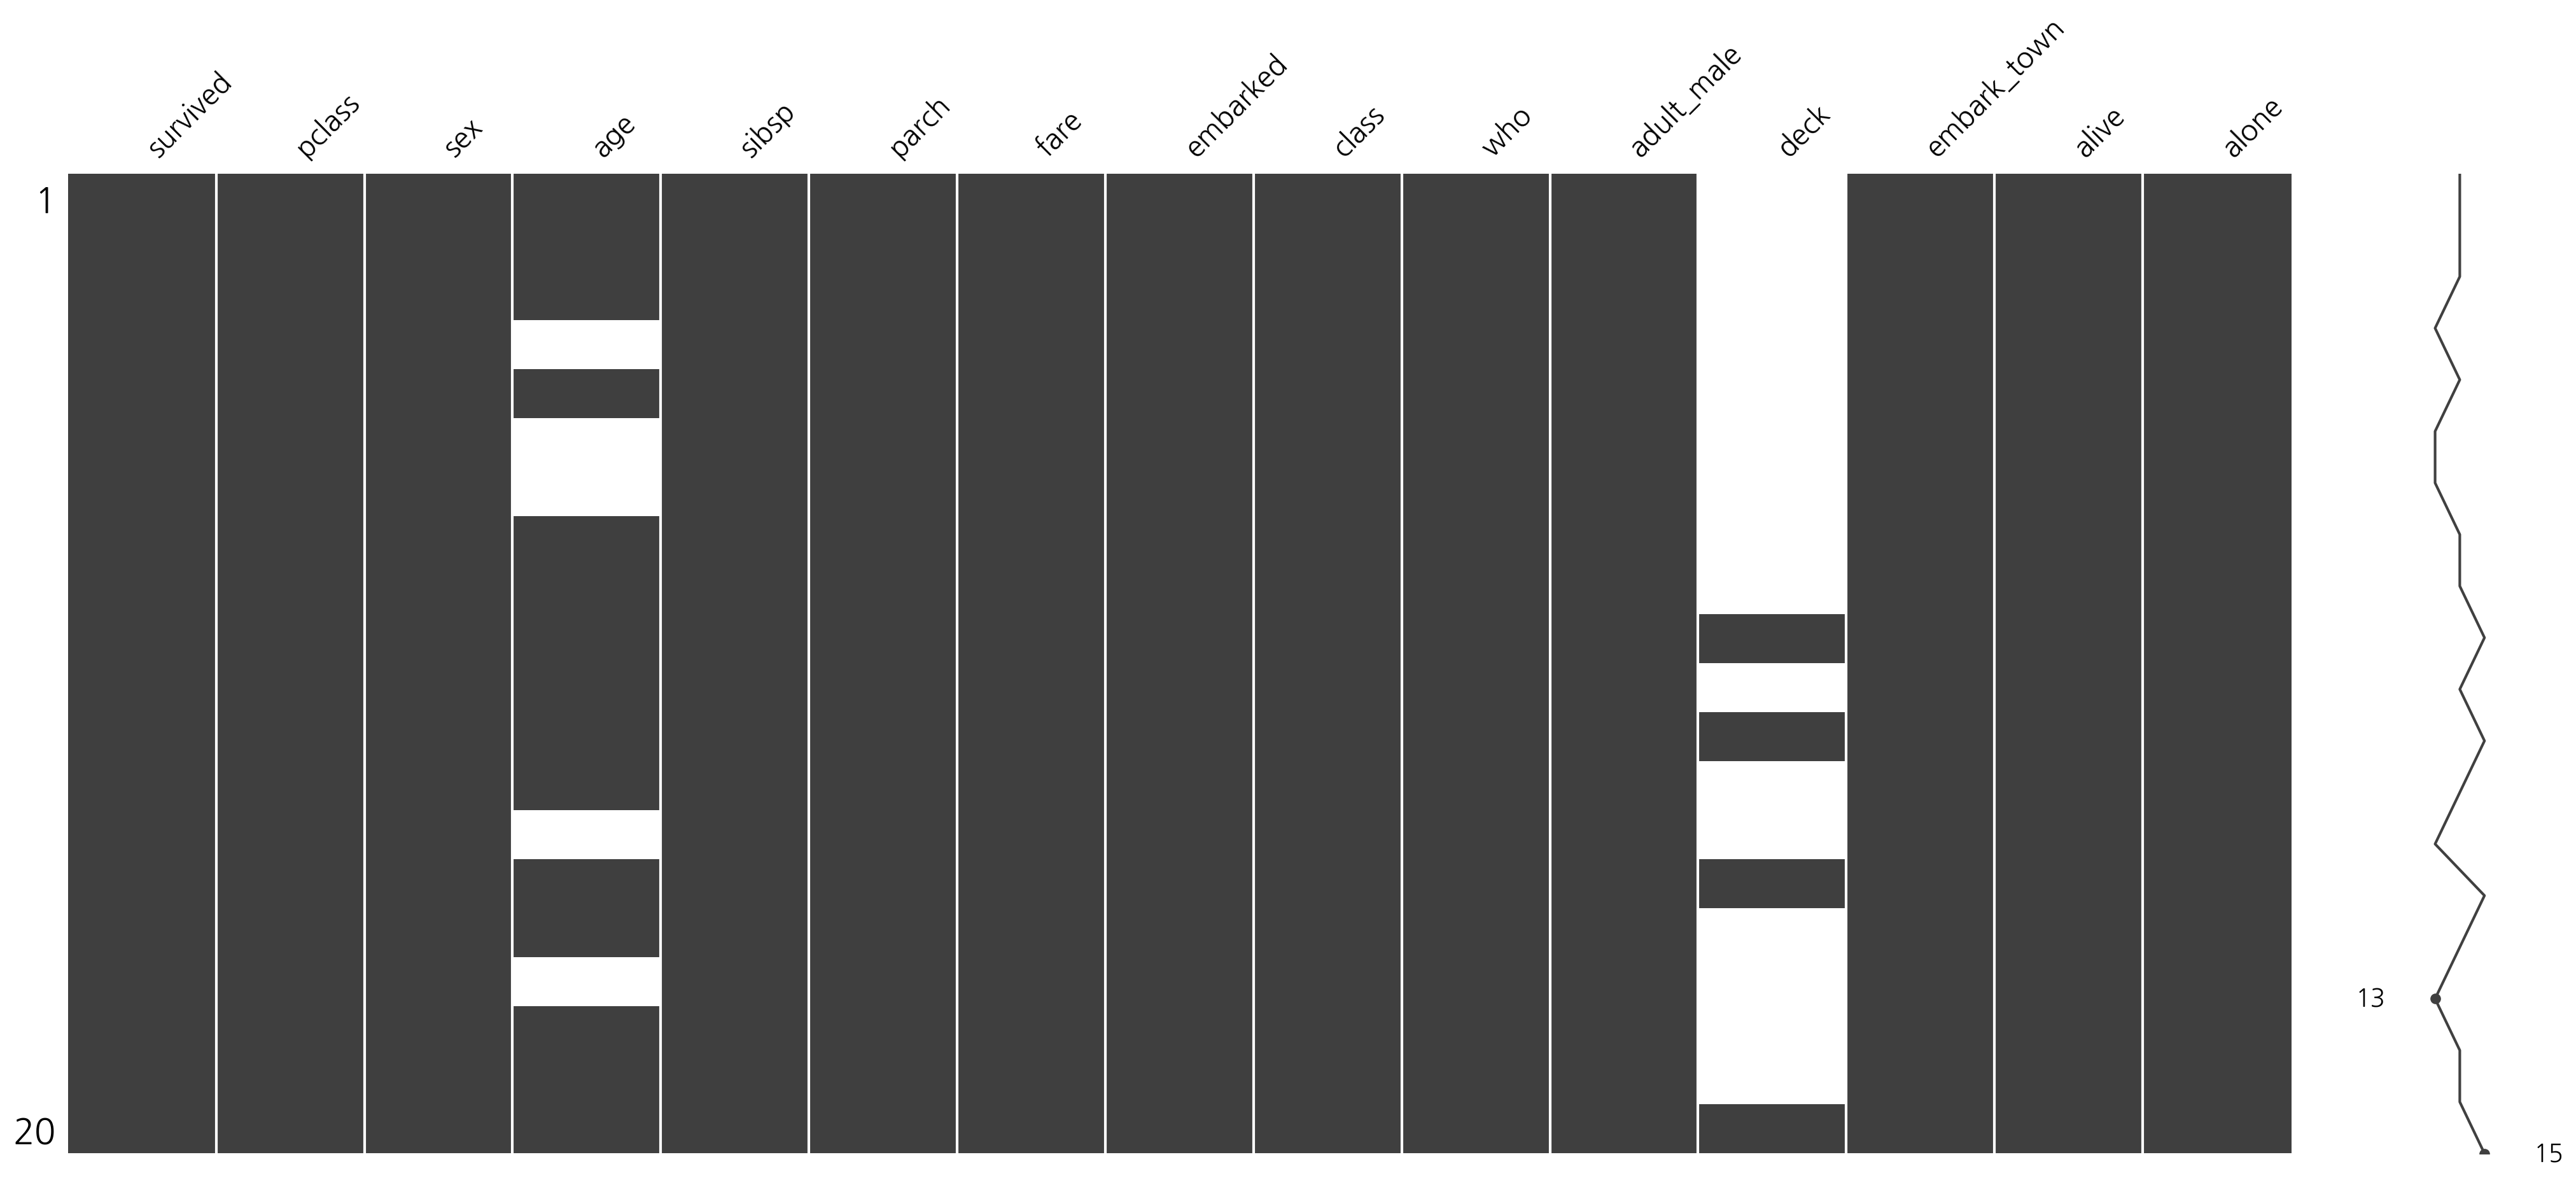

In [38]:
msno.matrix(tdf2)

- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링 있는 행을 가리킵니다.
  - 행마다 15개중 NaN이 아닌 유효한 데이터의 갯수를 나타내고
  - 그 점을 다음 행과 연결한 선

In [42]:
# 열 embarked가 NaN인 행 추출
tdf[ tdf.embarked.isna() ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [43]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.00,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.22,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.22,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.88,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.23,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.50,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.90,S,Third,man,True,NaN,Southampton,no,True


In [44]:
# 세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [45]:
# 최소한 1개의 NaN에 있는 행 추출
tdf[ tdf.isna( ).any(axis=1) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.07,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.05,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.12,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False


## 결측치 제거하기

In [46]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [47]:
df.dropna() # Nan이 적어도 하나 있는 행 제거

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [49]:
df.dropna(subset=['sex'])

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [50]:
df_nomiss = df.dropna(subset = ['score']) # score 결측치 제거된 데이터 만들기
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [51]:
df_nomiss['score'] + 1 # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [52]:
df.dropna(subset=['sex'], axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [54]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset = [2] , axis=1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [55]:
# 행 3에 NaN이 있으면 열을 제거
df.dropna(subset = [3] , axis=1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [56]:
df.dropna(axis = 1)

""
0
1
2
3
4


In [57]:
df.dropna(axis = 1).empty

True

In [58]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [59]:
df['score'].mean() # 결측값은 제거하고 계산

4.0

In [60]:
df['score'].sum()

16.0

In [61]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


## pandas 문서

In [62]:
df = pd.DataFrame(dict(age=[5, 6, np.nan],
                       born=[pd.NaT, pd.Timestamp('1939-05-27'),
                             pd.Timestamp('1940-04-25')],
                       name=['Alfred', 'Batman', ''],
                       toy=[None, 'Batmobile', 'Joker']))
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [65]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NaN],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [66]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [67]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [68]:
df.dropna(axis='columns') # 아무것도 없는 빈 데이터프레임

""
0
1
2
3


In [69]:
# 모든 값이 NaN인 경우, 행 제거
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


# 결측치 대체하기

In [70]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [71]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [72]:
exam.math.mean()

55.23529411764706

# 결측값 채워넣기 fillna()

In [73]:
exam['math'] = exam['math'].fillna(100)  # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


# 07-2 이상값 정제하기

In [74]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [75]:
df['sex'].value_counts()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [76]:
df['sex'].value_counts().sort_values()

sex
3    1
2    2
1    3
Name: count, dtype: int64

In [77]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [78]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [79]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


### 이상치 제거하기 - 극단적인 값

In [81]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
76,ford,expedition 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv
143,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
185,toyota,camry,3.5,2008,6,auto(s6),f,19,28,r,midsize
14,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact


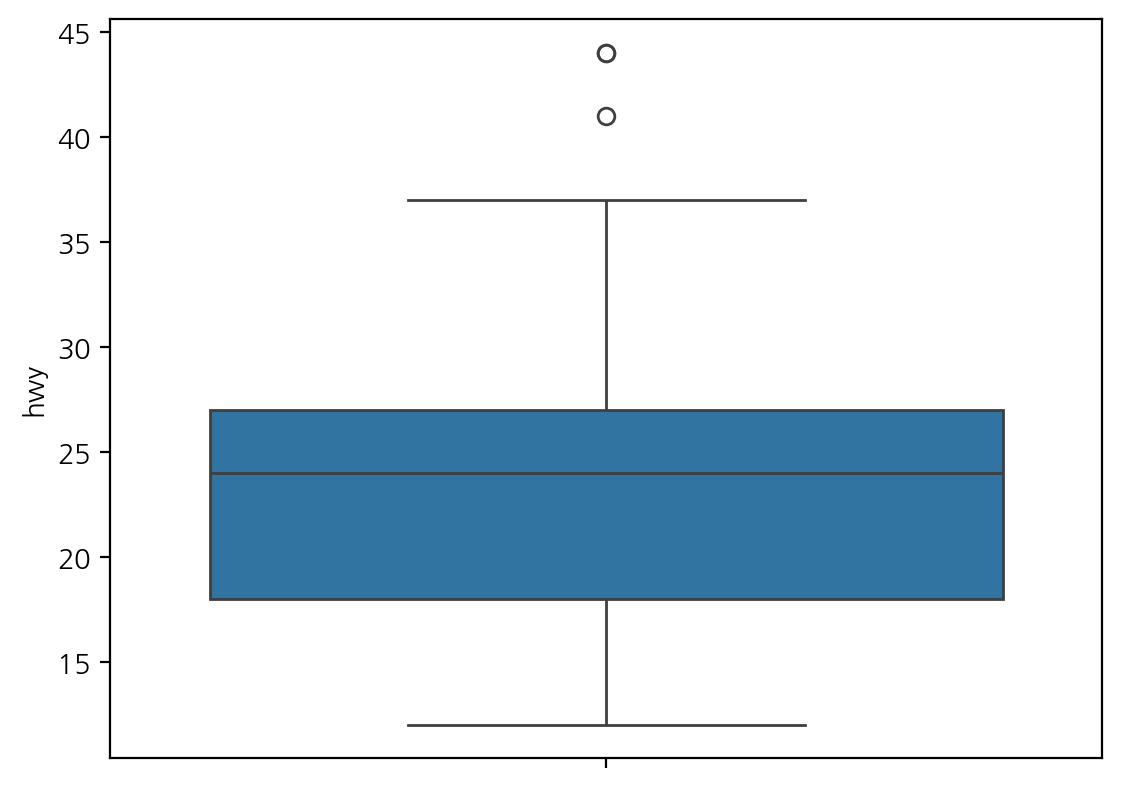

In [82]:
import seaborn as sns
sns.boxplot(mpg, y = 'hwy');

In [84]:
mpg.hwy.describe()

count    234.00
mean      23.44
std        5.95
min       12.00
25%       18.00
50%       24.00
75%       27.00
max       44.00
Name: hwy, dtype: float64

In [85]:
s=pd.Series([1, 2, 3, 4, 5])

In [86]:
s.quantile([.25, .5, .75])

0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [87]:
pct25, pct75 = mpg['hwy'].quantile([.25, .75])

In [88]:
pct25

18.0

In [89]:
pct75

27.0

#### IQR 구하기

### 3. 이상값을 결측 처리하기

In [ ]:
#4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] =np.where((mpg['hwy'] < 4.5 | mpg['hwy'] > 40.5))